In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.preprocessing import LabelEncoder

from numpy import array

import numpy as np

import matplotlib.pyplot as plt

import time

In [2]:
# Project Iris Predictors

In [3]:
iris = pd.read_csv ("../Data/iris.csv")
Species = iris.species.unique ()

In [4]:
# Pre-process our continuous features.
#  1. Scale
#  2. Translate

data = iris

for u in data:
    if is_numeric_dtype (u):
        data[u] /= data[u].max ()             # 0 ≤ x ≤ 1
        data[u] -= data[u].mean ()            # -1 ≤ x ≤ 1, mean (data[u]) == 0.0

data.describe ()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset = data.values                      # Extract the values from the dataframe into an array
x = dataset[:, 0:4].astype(float)          # Split off our input features
Labels = dataset [:, 4]                    # Split off our species

In [6]:
# Hot-encode our species.  This is done as follows:
# 1. Discover all of the unique labels and assign them a unique integers.
#    The integers corrospond to indices in the hot-encoded vector.

# 2. Build a vector of integers corrosponding to their labels

# 3. Build an array of vectors where only the correct entry has a 1

Hot = LabelEncoder ()
Hot.fit (Labels)                      # Find the unique labels and assign indices (1)
HotLabels = Hot.transform (Labels)    # Build a vector of indices (2)

TrainingLabels = np_utils.to_categorical (HotLabels) # Finally, build the vectors (3)

In [7]:
# Project 

In [8]:
# TrainingLabels

In [9]:
model = Sequential()                                                 # Keras container for our model

model.add (Dense (20, input_dim=4, activation='sigmoid'))            # input vector of dim 4
model.add (Dense (20, activation='sigmoid'))                          # Second layer, 8 neurons
model.add (Dense (3, activation='softmax'))                          # Softmax layer

model.compile (loss='categorical_crossentropy', optimizer='adam')    # Build our ANN

model.summary ()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________


2023-12-21 16:53:33.533849: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-21 16:53:33.533966: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
start = time.time ()
h = model.fit (x, TrainingLabels, verbose=False, epochs = 100)

dt = time.time () - start
print (dt)

2023-12-21 16:53:33.637649: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-21 16:53:33.798390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2.9658377170562744


In [11]:
h.history["loss"][99]

0.4607700705528259

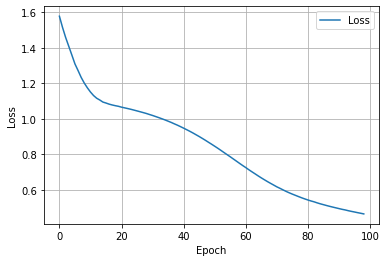

In [12]:
def LossHistory (history):
  plt.plot (history.history['loss'][0:99], label='Loss')
  plt.xlabel ('Epoch')
  plt.ylabel ('Loss')
  plt.legend ()
  plt.grid (True)
  plt.show ()

LossHistory (h)

In [13]:
predictions = model.predict (x, verbose=False).argmax (1)

sum (predictions == HotLabels)

2023-12-21 16:53:36.689314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


145

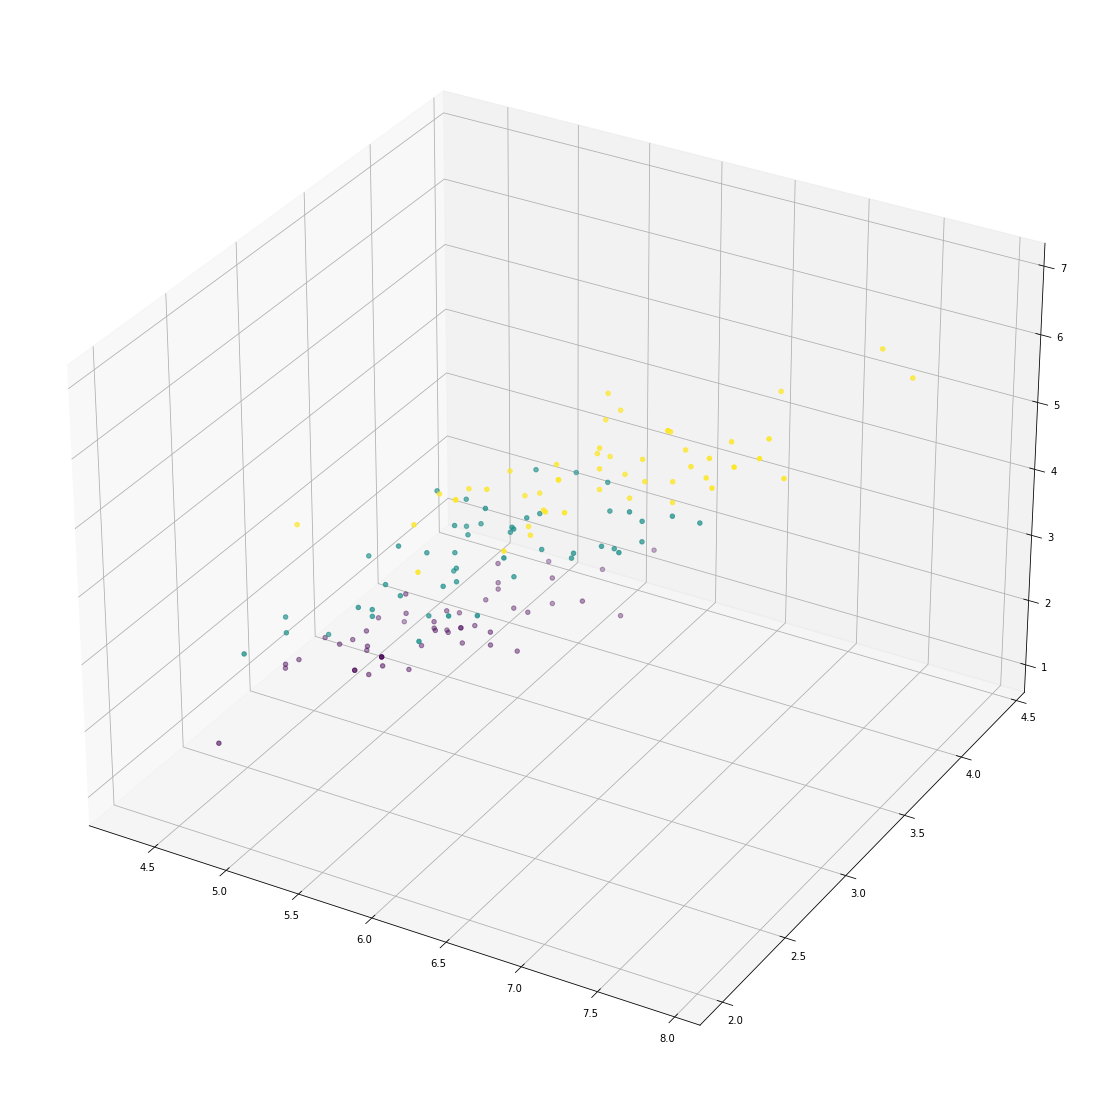

In [21]:
plt.rcParams['figure.figsize'] = [20, 20]

fig = plt.figure ()

ax = fig.add_subplot (projection="3d")

ax.scatter (x[:, 0], x[:, 1], x[:, 2], c=HotLabels)

plt.show()